# Softmax exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

This exercise is analogous to the SVM exercise. You will:

- implement a fully-vectorized **loss function** for the Softmax classifier
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** with numerical gradient
- use a validation set to **tune the learning rate and regularization** strength
- **optimize** the loss function with **SGD**
- **visualize** the final learned weights


In [3]:
import os
os.getcwd()

'C:\\Users\\ManicBird\\Dropbox\\CS231n\\CS231n\\assignment1'

In [15]:
import os
cs231n_dir = ['/home/manicbird/Dropbox/Python/CS231n/CS231n/assignment1',
               'D:/Dropbox/Python/CS231n/CS231n/assignment1',
               'C:/Users/ManicBird/Dropbox/CS231n/CS231n/assignment1']
for dr in cs231n_dir:
    if os.path.isdir(dr):
        os.chdir(dr)
        break

os.getcwd()

'C:\\Users\\ManicBird\\Dropbox\\CS231n\\CS231n\\assignment1'

In [4]:
import os
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = ['cs231n/datasets/cifar-10-batches-py',
                  '/home/manicbird/Dropbox/Python/cs231n_test/cs231n/datasets/cifar-10-batches-py',
                  'D:/Dropbox/Python/cs231n_test/cs231n/datasets/cifar-10-batches-py',
                  'C:/Users/ManicBird/Dropbox/Python/cs231n_test/cs231n/datasets/cifar-10-batches-py']
    for dr in cifar10_dir:
        if os.path.isdir(dr):
            X_train, y_train, X_test, y_test = load_CIFAR10(dr)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Softmax Classifier

Your code for this section will all be written inside **cs231n/classifiers/softmax.py**. 


In [ ]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

from cs231n.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

## Inline Question 1:
Why do we expect our loss to be close to -log(0.1)? Explain briefly.**

**Your answer:** *Fill this in*


In [20]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# similar to SVM case, do another gradient check with regularization
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -0.537860 analytic: -0.537860, relative error: 8.384565e-08


numerical: -1.254490 analytic: -1.254490, relative error: 5.388671e-08


numerical: 0.658628 analytic: 0.658628, relative error: 3.318421e-08


numerical: -0.390011 analytic: -0.390011, relative error: 2.638559e-09


numerical: -3.961905 analytic: -3.961905, relative error: 1.469549e-08


numerical: -0.336394 analytic: -0.336394, relative error: 2.041331e-07


numerical: -0.101572 analytic: -0.101572, relative error: 1.419165e-07


numerical: 0.838014 analytic: 0.838014, relative error: 3.841449e-08


numerical: -0.876908 analytic: -0.876908, relative error: 4.561164e-09


numerical: -3.784141 analytic: -3.784141, relative error: 3.983228e-09


numerical: -0.256031 analytic: -0.256031, relative error: 4.326035e-09


numerical: -3.599459 analytic: -3.599459, relative error: 9.714979e-10


numerical: 3.357809 analytic: 3.357809, relative error: 8.336138e-09


numerical: 3.837408 analytic: 3.837408, relative error: 5.947239e-09


numerical: 1.579545 analytic: 1.579545, relative error: 2.285643e-08


numerical: -3.246967 analytic: -3.246967, relative error: 6.318770e-09


numerical: -0.992478 analytic: -0.992478, relative error: 4.705638e-08


numerical: 4.486320 analytic: 4.486320, relative error: 1.938523e-08


numerical: -2.324495 analytic: -2.324495, relative error: 2.962078e-08


numerical: -1.426863 analytic: -1.426863, relative error: 9.710586e-09


In [ ]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

In [36]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from cs231n.classifiers import Softmax
  
results = {}
best_val = -1
best_softmax = None
learning_rates = [ 1e-6, 1e-4]
regularization_strengths = [1e-3, 40]

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
for l1 in learning_rates:
    for r1 in regularization_strengths:
        sfx = Softmax()
        sfx.train(X_train, y_train, learning_rate=l1, reg=r1,num_iters=1000, verbose=True)
        yHat = sfx.predict(X_val)
        accuracy = np.mean(yHat == y_val)
        print("acc({},{}) = {}".format(l1,r1,accuracy))
        if accuracy > best_val:
            best_val = accuracy
            best_softmax = sfx
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1000: loss 10.243426


iteration 100 / 1000: loss 21.328547


iteration 200 / 1000: loss 35.362445


iteration 300 / 1000: loss 46.364488


iteration 400 / 1000: loss 71.180594


iteration 500 / 1000: loss 71.766120


iteration 600 / 1000: loss 103.078684


C:\Users\ManicBird\Dropbox\CS231n\CS231n\assignment1\cs231n\classifiers\softmax.py:83: RuntimeWarning: divide by zero encountered in log
  loss += reg *  np.sum( W*W)


iteration 700 / 1000: loss 124.209371


iteration 800 / 1000: loss inf


iteration 900 / 1000: loss inf


acc(1e-06,0.001) = 0.262
iteration 0 / 1000: loss 13.099725


iteration 100 / 1000: loss 20.969771


iteration 200 / 1000: loss 32.876267


iteration 300 / 1000: loss 51.193758


iteration 400 / 1000: loss 70.077326


iteration 500 / 1000: loss 93.819534


iteration 600 / 1000: loss 101.115404


iteration 700 / 1000: loss 116.926315


iteration 800 / 1000: loss 137.464554


iteration 900 / 1000: loss 138.555463


acc(1e-06,40) = 0.267
iteration 0 / 1000: loss 11.391992


iteration 100 / 1000: loss inf


iteration 200 / 1000: loss inf


iteration 300 / 1000: loss inf


iteration 400 / 1000: loss inf


iteration 500 / 1000: loss inf


iteration 600 / 1000: loss inf


iteration 700 / 1000: loss inf


iteration 800 / 1000: loss inf


iteration 900 / 1000: loss inf


acc(0.0001,0.001) = 0.262
iteration 0 / 1000: loss 10.636544


iteration 100 / 1000: loss inf


iteration 200 / 1000: loss inf


iteration 300 / 1000: loss inf


iteration 400 / 1000: loss inf


iteration 500 / 1000: loss inf


iteration 600 / 1000: loss inf


iteration 700 / 1000: loss inf


iteration 800 / 1000: loss inf


iteration 900 / 1000: loss inf


acc(0.0001,40) = 0.263
best validation accuracy achieved during cross-validation: 0.267000


In [24]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.261000


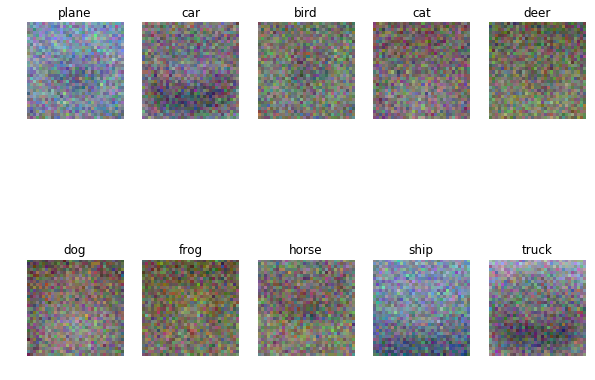

In [25]:
# Visualize the learned weights for each class
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])